# Introduction to Data Analytics with Pandas by Quentin Caudron

In [25]:
#https://www.youtube.com/watch?v=5XGycFIe8qE

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(10,7.5)})
sns.set_style('whitegrid')
sns.set_palette("ocean")

## Importing the data

In [2]:
data = pd.read_csv(r"C:\Users\admin-vicvphq\PycharmProjects\datasets\coffees.csv")

In [3]:
data.head(5)

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


In [4]:
data.loc[2]

timestamp      2011-10-05 07:02:00
coffees                    testing
contributor                Anthony
Name: 2, dtype: object

In [5]:
data.coffees[:10]

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
5      481.0
6      503.0
7      513.0
8      539.0
9      540.0
Name: coffees, dtype: object

## Data Exploration

In [6]:
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-06-08 11:55:00,9134.0,Quentin
freq,1,2,367


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 3 columns):
timestamp      671 non-null object
coffees        658 non-null object
contributor    671 non-null object
dtypes: object(3)
memory usage: 15.8+ KB


In [8]:
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


## Coffees has nulls and text, remove using subset of data and replace

In [9]:
data = data[data["coffees"] != "testing"]

In [10]:
data["coffees"] = pd.to_numeric(data["coffees"])
#errors = "coerce" argument can be passed in 

In [11]:
data["coffees"].dtype

dtype('float64')

In [12]:
data["coffees"] = data["coffees"].replace(np.nan, 0)

## Check dataset for nulls again

In [13]:
data.isnull().sum()

timestamp      0
coffees        0
contributor    0
dtype: int64

## Timestamp series needs to be converted to datetime

In [14]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [15]:
data.dtypes

timestamp      datetime64[ns]
coffees               float64
contributor            object
dtype: object

In [16]:
data["coffees"] = data["coffees"].astype(int)

In [17]:
data["coffees"]

0        397
1        410
3          0
4        464
5        481
6        503
7        513
8        539
9        540
10       563
11       581
12       587
13       605
14       616
15         0
16       626
17       635
18       650
19       656
20       673
21       694
22       699
23       713
24       770
25       790
26       799
27       805
28       818
29       819
30       837
       ...  
641        0
642        0
643    16195
644    16237
645    16257
646    16513
647    16659
648    16714
649    16891
650    16909
651    16977
652    17104
653        0
654    17165
655    17345
656    17354
657    17468
658    17489
659    17564
660    17789
661    17793
662    17824
663    17852
664    17868
665    18062
666    18235
667    18942
668    19698
669    24450
670    24463
Name: coffees, Length: 670, dtype: int32

## Add two date derivation columns and rename them

In [18]:
data = pd.concat([data, 
                  data['timestamp'].dt.strftime("%A"), 
                  data['timestamp'].dt.strftime("%B")], axis = 1)

In [19]:
data.head()

,timestamp,coffees,contributor,timestamp,timestamp
0,2011-10-03 08:22:00,397,Quentin,Monday,October
1,2011-10-04 11:48:00,410,Quentin,Tuesday,October
3,2011-10-05 08:25:00,0,Quentin,Wednesday,October
4,2011-10-05 10:47:00,464,Quentin,Wednesday,October
5,2011-10-05 13:15:00,481,Quentin,Wednesday,October


In [20]:
data.columns = ["timestamp", "coffees", "contributor", "weekday_name", "month_name"]

## Check how many coffees in total

In [21]:
data.coffees.sum()

5629486

## Visualization

In [22]:
import seaborn as sns

In [58]:
sum_coffee_by_weekday_name = data.groupby(["weekday_name"])["coffees"].sum()

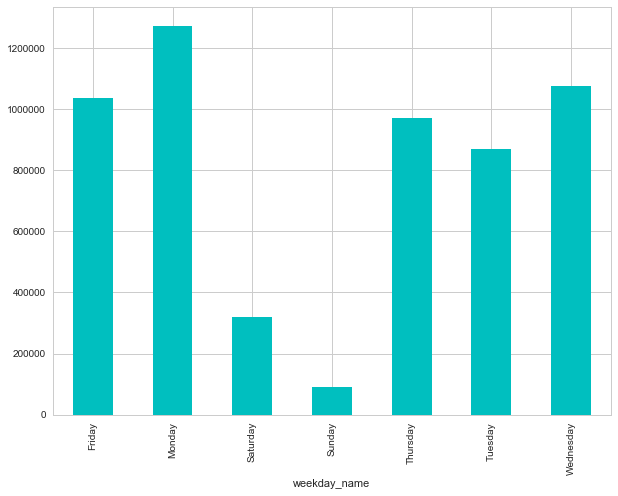

In [59]:
sum_coffee_by_weekday_name.plot(kind = "bar", color = "c")

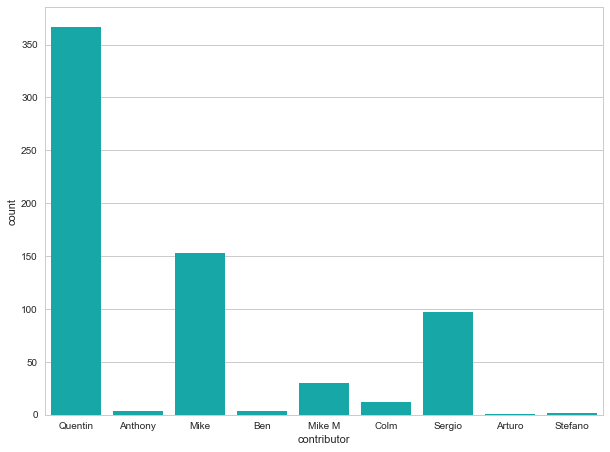

In [62]:
sns.countplot(data = data, x = "contributor", color = "c")